In [472]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import norm, skew


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = 10,6

In [473]:
train = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\lr\train.csv')
test = pd.read_csv(r'C:\Users\Максим\Desktop\Аналитика данных\Datasets\lr\test.csv')

# Простая линейная регрессия

## Просмотр и предобработка данных

In [474]:
train.head()

,x,y
0,24.000,21.549
1,50.000,47.464
2,15.000,17.219
3,38.000,36.586
4,87.000,87.289


In [475]:
train.shape

(700, 2)

In [476]:
test.head()

,x,y
0,77,79.775
1,21,23.177
2,22,25.609
3,20,17.857
4,36,41.850


In [477]:
test.shape

(300, 2)

In [478]:
train.isnull().sum()

x    0
y    1
dtype: int64

In [479]:
train['y'].fillna(train['y'].median(), inplace=True)

In [480]:
train.isnull().sum()

x    0
y    0
dtype: int64

In [481]:
test.isnull().sum()

x    0
y    0
dtype: int64

In [482]:
train.describe()

,x,y
count,700.000,700.000
mean,54.986,49.938
std,134.682,29.088
min,0.000,-3.840
25%,25.000,24.986
50%,49.000,48.973
75%,75.000,74.881
max,"3,530.157",108.872


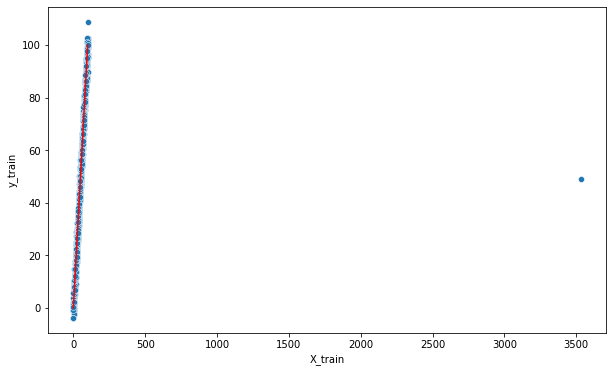

In [483]:
sns.scatterplot(data=train, x='x', y='y')
plt.plot([0, 100], [0, 100], color='r')
plt.xlabel('X_train')
plt.ylabel('y_train');

Замечен выброс

In [484]:
train = train.drop(train[train['x']>500].index)

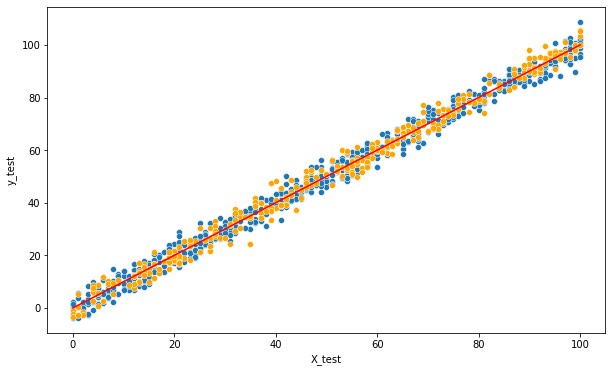

In [485]:
sns.scatterplot(data=train, x='x', y='y')
plt.plot([0, 100], [0, 100], color='r')
plt.xlabel('X_train')
plt.ylabel('y_train');

sns.scatterplot(data=test, x='x', y='y', color='orange')
plt.xlabel('X_test')
plt.ylabel('y_test');

## Обучение линейной регрессионной модели

In [543]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [487]:
X_train = np.asarray(train['x']).reshape(-1, 1)
y_train = np.asarray(train['y']).reshape(-1, 1)
X_test = np.asarray(test['x']).reshape(-1, 1)
y_test = np.asarray(test['y']).reshape(-1, 1)

In [488]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [489]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

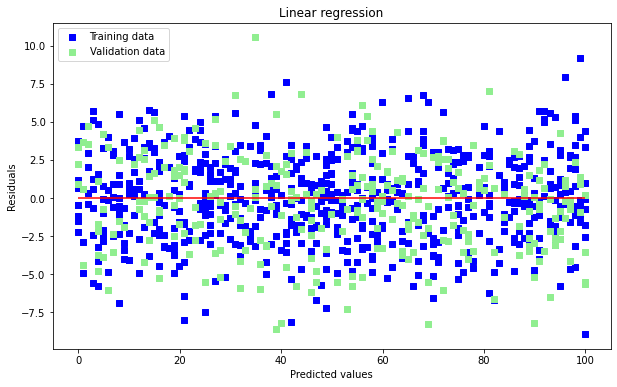

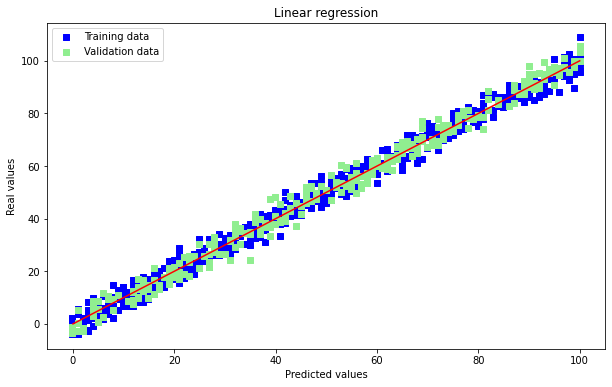

In [490]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 100, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 100], [0, 100], c = "red")
plt.show()

In [491]:
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

9.432922192039317
0.9888014444327563


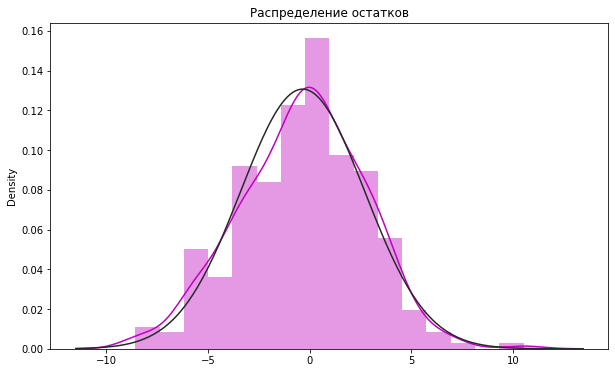

In [492]:
sns.distplot(y_test_pred-y_test, fit=norm, color='m')
plt.title('Распределение остатков');

# Множественная линейная регрессия

## Просмотр и предобработка данных

### Просмотр и переименование столбцов

In [493]:
df = pd.read_csv('Real Estate.csv')

In [494]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,"2,012.917",32.000,84.879,10,24.983,121.540,37.900
1,2,"2,012.917",19.500,306.595,9,24.980,121.540,42.200
2,3,"2,013.583",13.300,561.985,5,24.987,121.544,47.300
3,4,"2,013.500",13.300,561.985,5,24.987,121.544,54.800
4,5,"2,012.833",5.000,390.568,5,24.979,121.542,43.100


In [495]:
df.shape

(414, 8)

In [496]:
df = df.drop(df.columns[0], axis=1)

In [497]:
# Сохраним обозначение столбцов

description = list(df.columns)
description

['X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [498]:
cols = [x[:2].strip() for x in df.columns]
df.columns = cols

In [499]:
df.isnull().sum().sum()

0

In [523]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4      int64
X5    float64
X6    float64
Y     float64
dtype: object

In [500]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,"2,013.149",17.713,"1,083.886",4.094,24.969,121.533,37.980
std,0.282,11.392,"1,262.110",2.946,0.012,0.015,13.606
min,"2,012.667",0.000,23.383,0.000,24.932,121.474,7.600
25%,"2,012.917",9.025,289.325,1.000,24.963,121.528,27.700
50%,"2,013.167",16.100,492.231,4.000,24.971,121.539,38.450
75%,"2,013.417",28.150,"1,454.279",6.000,24.977,121.543,46.600
max,"2,013.583",43.800,"6,488.021",10.000,25.015,121.566,117.500


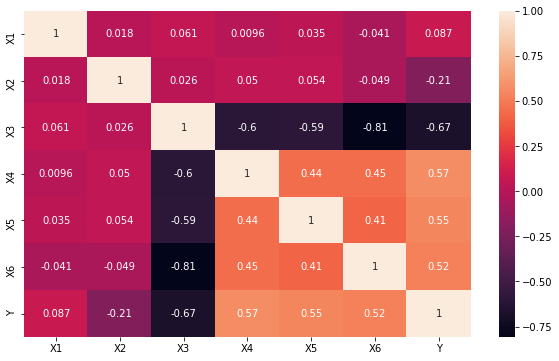

In [501]:
sns.heatmap(df.corr(), annot=True);

In [502]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,"2,012.917",32.000,84.879,10,24.983,121.540,37.900
1,"2,012.917",19.500,306.595,9,24.980,121.540,42.200
2,"2,013.583",13.300,561.985,5,24.987,121.544,47.300
3,"2,013.500",13.300,561.985,5,24.987,121.544,54.800
4,"2,012.833",5.000,390.568,5,24.979,121.542,43.100


In [503]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')

In [524]:
df['X1'].unique()

array([2012.917, 2013.583, 2013.5  , 2012.833, 2012.667, 2013.417,
       2013.083, 2013.333, 2013.25 , 2012.75 , 2013.   , 2013.167])

Можно заметить, что в столбце Х1 12 уникальных значений. Можно следать этот признак категориальным и преобразовать значения.

In [526]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder() 
lbl.fit(list(df['X1'].values)) 
df['X1'] = lbl.transform(list(df['X1'].values))

### Поиск выбросов

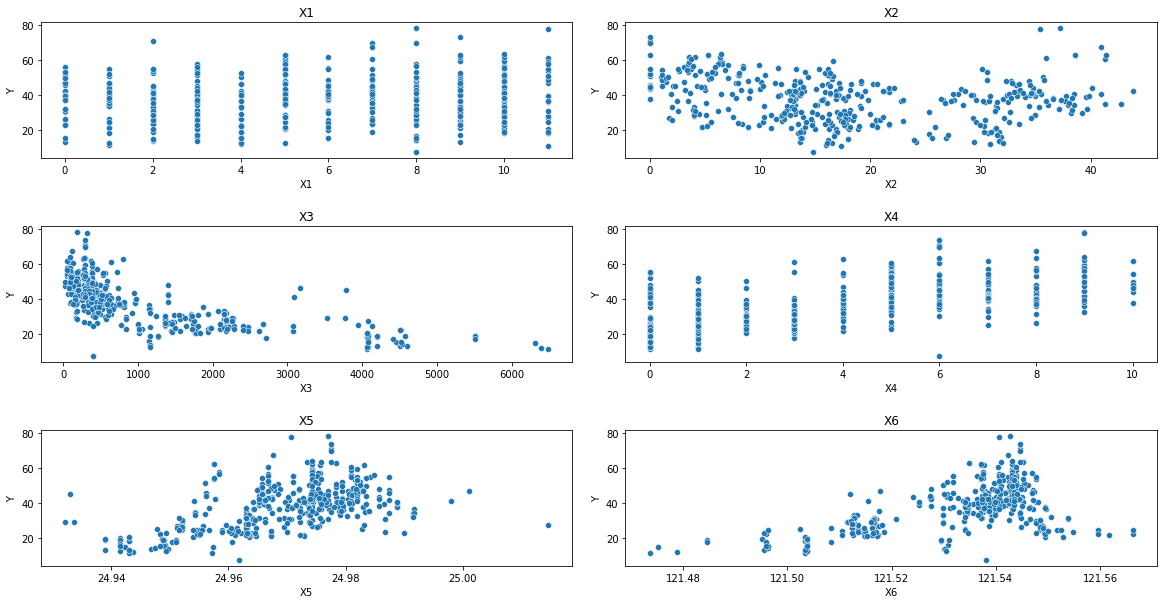

In [528]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for n, f in enumerate(df.columns[:-1], start=1):
    plt.subplot(3, 2, n)
    sns.scatterplot(x=df[f], y=df['Y'])
    plt.title(f)

In [529]:
# Удалим выброс, где цена около 120

df = df.drop(df[df['Y']>110].index)

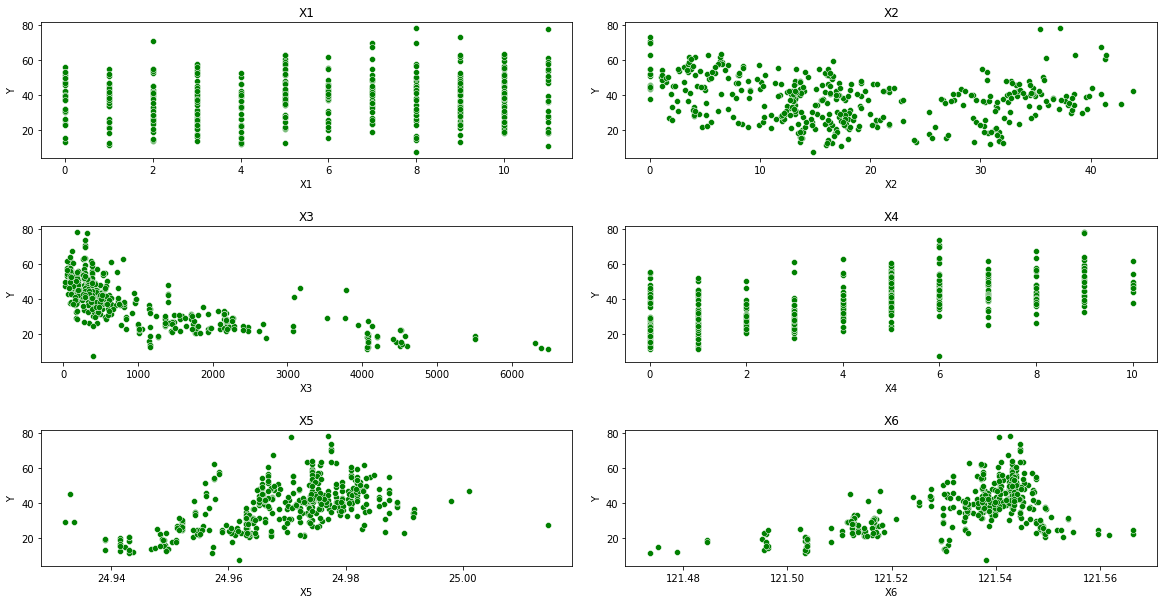

In [530]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.5)

for n, f in enumerate(df.columns[:-1], start=1):
    plt.subplot(3, 2, n)
    sns.scatterplot(x=df[f], y=df['Y'], color='g')
    plt.title(f)

### Распределение признаков

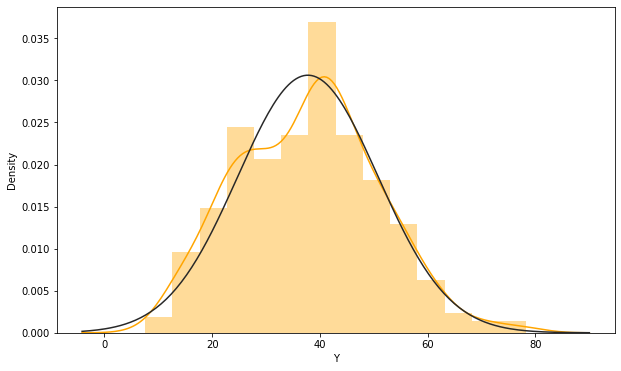

In [531]:
sns.distplot(df['Y'], fit=norm, color='orange');

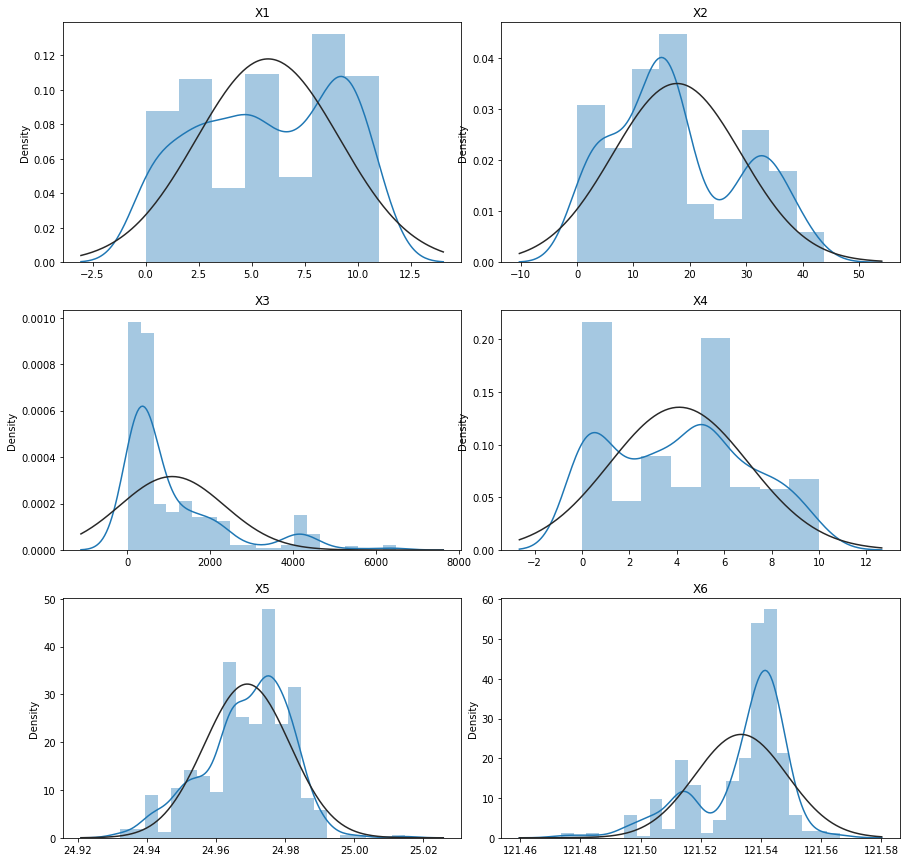

In [532]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

for n, f in enumerate(df.columns[:-1], start=1):
    plt.subplot(3, 2, n)
    sns.distplot(x=df[f], fit=norm)
    plt.title(f)

Распределения многих признаков далеки от нормального

In [533]:
df1 = df.copy()

In [534]:
for f in df1.columns:
    df1[f] = df1[f].apply(np.log1p)

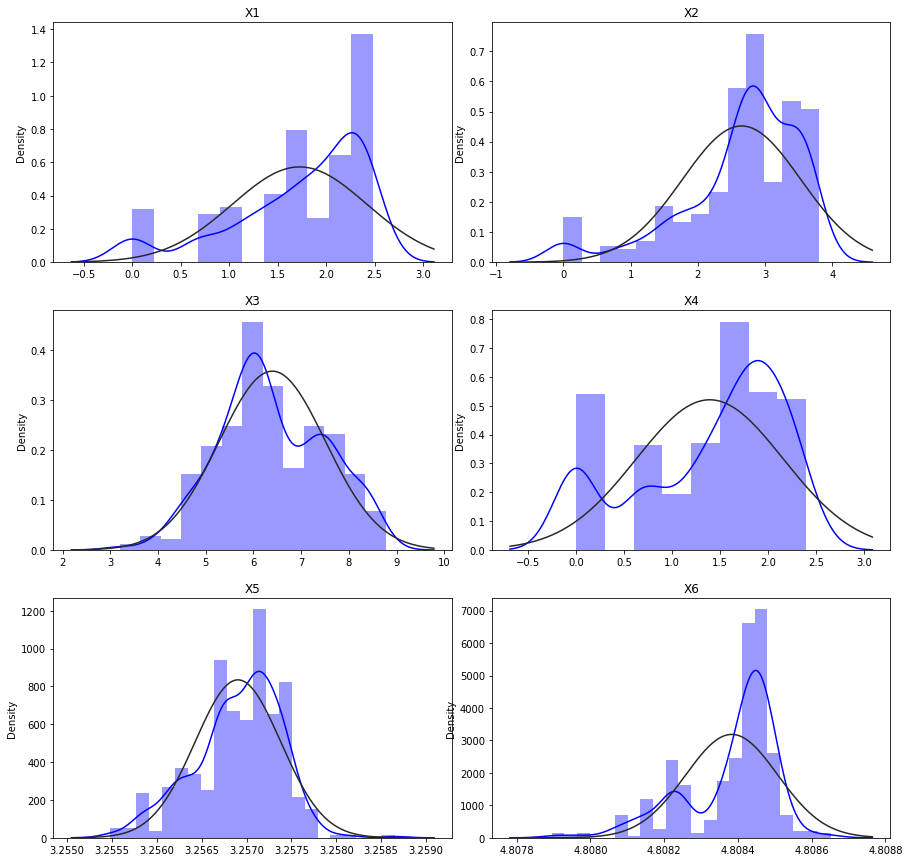

In [535]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

for n, f in enumerate(df1.columns[:-1], start=1):
    plt.subplot(3, 2, n)
    sns.distplot(x=df1[f], fit=norm, color='b')
    plt.title(f)

Распределения стали чуть ближе к нормальному

## Множественная линейная регрессия. Строим модель

In [536]:
from sklearn.model_selection import train_test_split

In [537]:
X = df1.drop(columns='Y', axis=1)
y = df1['Y']

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [539]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [540]:
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

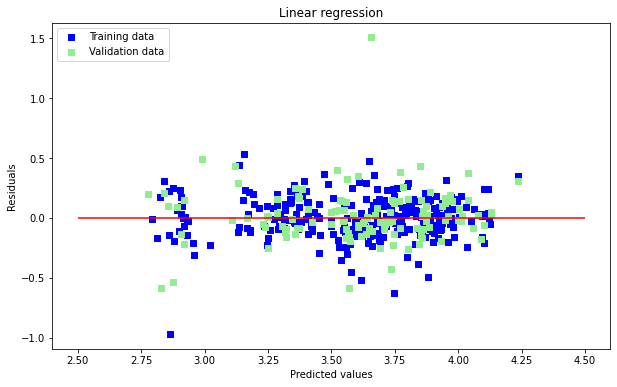

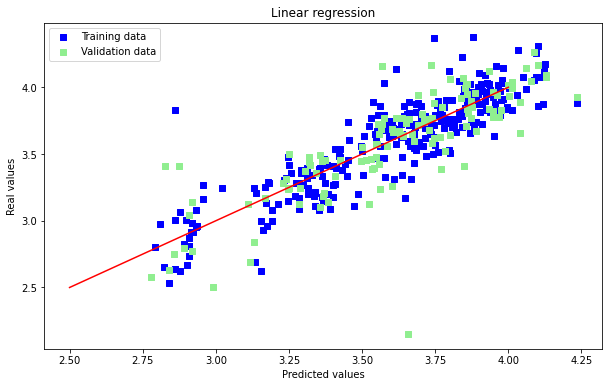

In [541]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2.5, xmax = 4.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.5, 4], [2.5, 4], c = "red")
plt.show()

In [550]:
print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'R2: {r2_score(y_test, y_test_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_test_pred)}')

MSE: 0.05286958175904889
R2: 0.6489534564936055
MAE: 0.14925348403816577
